# 4.2.1 Varying the Characteristic Exposure Time

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
from sensible_raw.loaders import loader
from world_viewer.cns_world import CNSWorld
from world_viewer.glasses import Glasses
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from matplotlib.colors import LogNorm
from sklearn.utils import shuffle


In [2]:
# load data
cns = CNSWorld()
cns.load_world(opinions = ['fitness'], read_cached = False, stop=False, write_pickle = False, continous_op=False)
cns_glasses = Glasses(cns)

# load exposure
exposure3 = pd.read_pickle("tmp/fitness_exposure_tx3.pkl")
exposure7 = pd.read_pickle("tmp/fitness_exposure_tx7.pkl")#.set_index(['node_id','time'])
exposure14 = pd.read_pickle("tmp/fitness_exposure_tx14.pkl")

# alternative: recalculate exposure value
# exposure7 = cns_glasses.calc_exposure("expo_frac", "op_fitness", exposure_time = 7)

Process opinion data for variable: fitness


In [3]:
# set analysis parameter
analysis = 'expo_frac'
opinion_type = "op_fitness"
binning = True
n_bins = 10
save_plots = True
show_plot = True

In [4]:
# filter by degree for different t_x
degree3 = exposure3.groupby("node_id").n_nbs.mean().to_frame("avg").reset_index()
exposure3 = exposure3.loc[degree3.loc[degree3.avg >= 4,"node_id"]]
degree7 = exposure7.groupby("node_id").n_nbs.mean().to_frame("avg").reset_index()
exposure7 = exposure7.loc[degree7.loc[degree7.avg >= 4,"node_id"]]
degree14 = exposure14.groupby("node_id").n_nbs.mean().to_frame("avg").reset_index()
exposure14 = exposure14.loc[degree14.loc[degree14.avg >= 4,"node_id"]]

# filter by n_bar
exposure3 = exposure3[exposure3.n_nbs_mean > 1/7]
exposure7 = exposure7[exposure7.n_nbs_mean > 1/7]
exposure14 = exposure14[exposure14.n_nbs_mean > 1/7]

# use abosolute exposure "n_influencer_summed"
exposure3.rename(columns={"exposure":"exposure_old", "n_influencer_summed":"exposure"},inplace=True)
exposure7.rename(columns={"exposure":"exposure_old", "n_influencer_summed":"exposure"},inplace=True)
exposure14.rename(columns={"exposure":"exposure_old", "n_influencer_summed":"exposure"},inplace=True)

# set time period to spring
start = "2014-02-01"
end = "2014-04-30"
exposure3.reset_index(inplace=True)
exposure3 = exposure3.loc[(exposure3.time >= pd.to_datetime(start)) & (exposure3.time <= pd.to_datetime(end))]
exposure3.set_index(['node_id','time'],inplace=True)
exposure7.reset_index(inplace=True)
exposure7 = exposure7.loc[(exposure7.time >= pd.to_datetime(start)) & (exposure7.time <= pd.to_datetime(end))]
exposure7.set_index(['node_id','time'],inplace=True)
exposure14.reset_index(inplace=True)
exposure14 = exposure14.loc[(exposure14.time >= pd.to_datetime(start)) & (exposure14.time <= pd.to_datetime(end))]
exposure14.set_index(['node_id','time'],inplace=True)

# calculate if nodes changed trait after experiencing a certain exposure
# save value as column "op_change" (bool)data3, expo_agg3 = cns_glasses.opinion_change_per_exposure(exposure3, opinion_type, opinion_change_time = 1)
data7, expo_agg7 = cns_glasses.opinion_change_per_exposure(exposure7, opinion_type, opinion_change_time = 1)
data14, expo_agg14 = cns_glasses.opinion_change_per_exposure(exposure14, opinion_type, opinion_change_time = 1)

INFO: Calc op-change
INFO: Calc op-change
INFO: Calc op-change


<IPython.core.display.Javascript object>


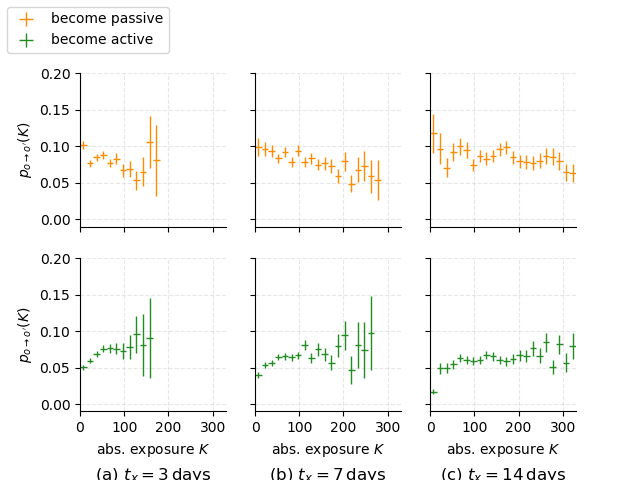

/home/lochnerpik@gmail.com/master/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'
  seen=seen, canon=canonical, used=seen[-1]))


In [5]:
# plot figure 4.11

analysis = 'expo_nmb'
direction = False
cns_glasses.output_folder = "final/"
n_bins=15
min_bin_size = 30
q_binning = False
save_plots = False
x_max = 330
bin_width=15
fig, ax = plt.subplots(2,3,subplot_kw = {"adjustable":'box', "aspect":x_max/0.2})
ax[1][0].set_title(r"(a) $t_x=3\,$days", y=-0.5)
ax[1][1].set_title(r"(b) $t_x=7\,$days", y=-0.5)
ax[1][2].set_title(r"(c) $t_x=14\,$days", y=-0.5)
data3 = data3[data3.exposure < x_max]
data7 = data7[data7.exposure < x_max]
data14 = data14[data14.exposure < x_max]

_,_,l1, = cns_glasses.plot_opinion_change_per_exposure_number(data3[data3.op_fitness == direction], analysis, binning, n_bins=n_bins-5,\
            save_plots=save_plots, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim =0.2, fig=fig, ax=ax[0][0], label="become passive", bin_width=bin_width, \
            q_binning = q_binning, loglog=False, step_plot=True, color="darkorange", legend=False, min_bin_size=min_bin_size, x_lim=x_max, xlabel=r"abs. exposure $K$")
cns_glasses.plot_opinion_change_per_exposure_number(data7[data7.op_fitness == direction], analysis, binning, n_bins, \
            save_plots=save_plots, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = 0.2,fig=fig,  ax=ax[0][1], label="become passive", bin_width=bin_width, \
             loglog=False, q_binning=q_binning, step_plot=True, color="darkorange", legend=False, min_bin_size=min_bin_size, x_lim=x_max, xlabel=r"abs. exposure $K$")
cns_glasses.plot_opinion_change_per_exposure_number(data14[data14.op_fitness == direction], analysis, binning, n_bins, \
            save_plots=save_plots, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = 0.2,fig=fig,  ax=ax[0][2], label="become passive", bin_width=bin_width, \
            loglog=False, q_binning=q_binning, step_plot=True, color="darkorange", legend=False, min_bin_size=min_bin_size, x_lim=x_max, xlabel=r"abs. exposure $K$")
direction = True
_,_,l2, = cns_glasses.plot_opinion_change_per_exposure_number(data3[data3.op_fitness == direction], analysis, binning, n_bins=n_bins-5, \
            save_plots=save_plots, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim =0.2, fig=fig, ax=ax[1][0], label="become active", bin_width=bin_width, \
             q_binning = q_binning, loglog=False, step_plot=True, color="forestgreen", legend=False, min_bin_size=min_bin_size, x_lim=x_max, xlabel=r"abs. exposure $K$")
cns_glasses.plot_opinion_change_per_exposure_number(data7[data7.op_fitness == direction], analysis, binning, n_bins, \
            save_plots=save_plots, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = 0.2,fig=fig,  ax=ax[1][1], label="become active", bin_width=bin_width, \
            loglog=False, q_binning=q_binning, step_plot=True, color="forestgreen", legend=False, min_bin_size=min_bin_size, x_lim=x_max, xlabel=r"abs. exposure $K$")
cns_glasses.plot_opinion_change_per_exposure_number(data14[data14.op_fitness == direction], analysis, binning, n_bins, \
            save_plots=save_plots, show_plot=show_plot, y_lower_lim=-0.01, y_upper_lim = 0.2,fig=fig,  ax=ax[1][2], label="become active", bin_width=bin_width, \
            loglog=False, q_binning=q_binning, step_plot=True, color="forestgreen", legend=False, min_bin_size=min_bin_size, x_lim=x_max, xlabel=r"abs. exposure $K$")

for i in range(2):
    for j in range(3):
        ax[i][j].set_xticks((0,100,200, 300))


fig.legend((l1,l2), ("become passive","become active"),"upper left")
fig.subplots_adjust(hspace=0)
#fig.tight_layout()
fig.savefig("tmp/final/char_expo_time_vgl_absoulute_qbin.pdf" , bbox_inches='tight')